- 1. 차원축소의 3가지 접근법
    - 피처선택 : 불필요한 피처를 버림, 상관계수 값을 통해 판단
    - 피처추출 : 더 작은 차원으로 피처를 매핑, PCA, LDA, SVD, NMF
    - 피처생성 : 피처가 부족한 상황일 때 적용하는 기법
    
- 2. PCA
    - 가장 대표적인 차원 축소 알고리즘
    - 여러 피처간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출한 후 차원을 축소
    - 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축을 기준으로 차원을 축소
    
- 3. PCA 수행과정
    - 입력 데이터 세트의 공분산 행렬을 생성
    - 공분산 행렬의 고유벡터와 고유값을 계산
    - 고유값이 가장 큰 순으로 k개(차수) 만큼 고유벡터 추출
    - 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

# 라이브러리 로딩

In [8]:
import numpy as np  # 넘파이
import pandas as pd  # 판다스
import seaborn as sns  # 시본
import matplotlib as mpl
import matplotlib.pyplot as plt  # matplotlib
from sklearn.datasets import load_iris

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
%config InlineBackend.figure_foramt = 'retina'
# 자동완성 속도 증가
%config Completer.use_jedi = False
# 한글 깨짐 해결
plt.rc('font', family='D2coding')
mpl.rc('axes', unicode_minus=False)

In [23]:
iris = load_iris()
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


## 각 클래스별 데이터 분포 시각화

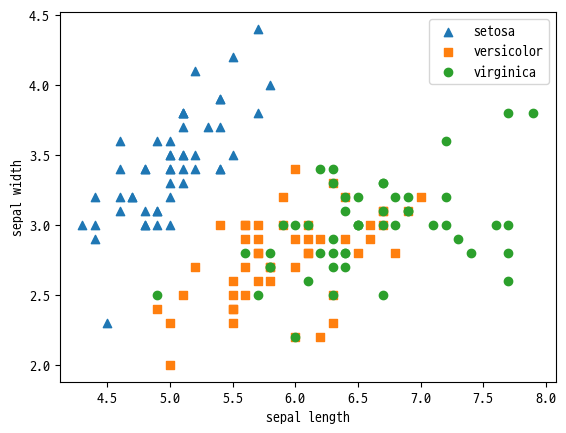

In [27]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='best')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 스케일링
- PCA는 적용전에 스케일링 작업이 필요하다

In [32]:
from sklearn.preprocessing import StandardScaler

iris_input = iris_df.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(iris_input)
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = iris_df.target
iris_scaled_df.head(3)

,0,1,2,3,target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0


In [38]:
iris_f_scaled = pd.DataFrame(StandardScaler().fit_transform(iris_df.iloc[:, :-1]))
iris_f_scaled.head(3)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


## 주성분 분석을 통해 차원축소

In [40]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components=2)

# 스케일 데이터 => PCA 변환 데이터
pca.fit(iris_f_scaled)
iris_pca = pca.transform(iris_f_scaled)

# 변환 후 차원 추출
print(f'스케일 데이터 : {iris_f_scaled.shape}')
print(f'PCA 변환 데이터 : {iris_pca.shape}')

스케일 데이터 : (150, 4)
PCA 변환 데이터 : (150, 2)


In [41]:
# PCA 데이터 프레임 생성
pca_columns = ['pca_component_1', 'pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target
iris_df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


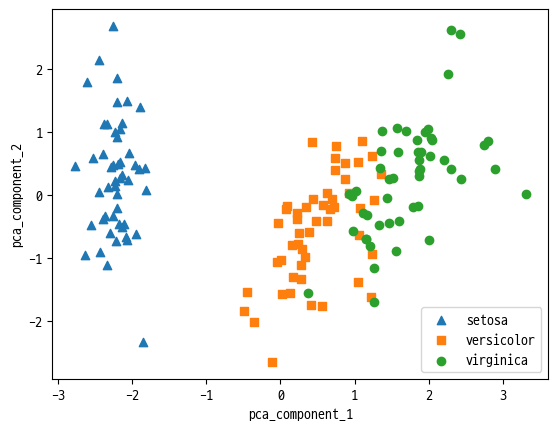

In [42]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_1']
    y_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_2']
    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='best')
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [45]:
# component 변동성이 반영된 변동 비율
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.9581320720000164

## PCA 변환 전/후 분류

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
scores = cross_val_score(rcf, iris_df.iloc[:, :-1],
                         iris_df.target, scoring='accuracy', cv=3)
# 정확도
print(f'원본 데이터 fold별 정확도: {scores}')
print(f'원본 데이터 평균 정확도: {np.mean(scores): .4f}')

원본 데이터 fold별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.9600


In [49]:
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
pca_scores = cross_val_score(rcf, iris_df_pca.iloc[:, :-1],
                             iris_df_pca.target, scoring='accuracy', cv=3)
# 정확도
print(f'원본 데이터 fold별 정확도: {pca_scores}')
print(f'원본 데이터 평균 정확도: {np.mean(pca_scores): .4f}')

원본 데이터 fold별 정확도: [0.88 0.88 0.9 ]
원본 데이터 평균 정확도:  0.8867


# UCI 신용카드 고객 데이터

In [51]:
df = pd.read_excel('C:/k_digital/source/data/pca_credit_card.xls',
                   header=1, sheet_name='Data').iloc[0:, 1:]  #
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [52]:
df.shape

(30000, 24)

In [53]:
# 컬럼명 변경
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'},
          inplace=True)

In [55]:
X_features = df.drop('default', axis=1)
y_target = df['default']

<AxesSubplot:>

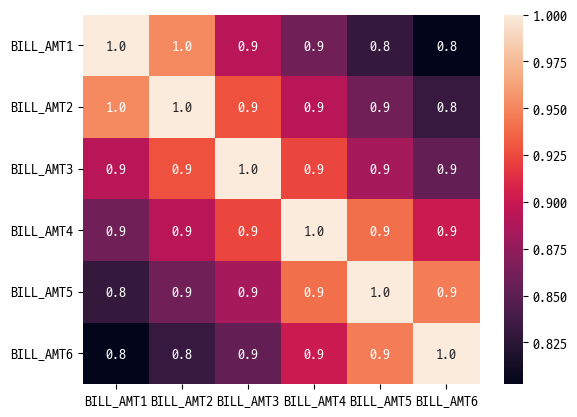

In [57]:
# 피처선택 : 불필요한 피처 제거 - 상관계수 확인
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]

# 피처 상관관계
# corr = X_features.corr()
corr = X_features[cols_bill].corr()
sns.heatmap(corr, annot=True, fmt='.1f')

In [58]:
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 연동성:', pca.explained_variance_ratio_)

PCA Component별 연동성: [0.90555253 0.0509867 ]


In [65]:
rcf = RandomForestClassifier(n_estimators=300, random_state=1017, n_jobs=-1)

scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print(f'원본 데이터 fold별 정확도: {scores}')
print(f'원본 데이터 평균 정확도: {np.mean(scores): .4f}')

원본 데이터 fold별 정확도: [0.8082 0.8217 0.8223]
원본 데이터 평균 정확도:  0.8174


In [68]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)

rcf = RandomForestClassifier(n_estimators=300, random_state=1017, n_jobs=-1)

pca_scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print(f'원본 데이터 fold별 정확도: {pca_scores}')
print(f'원본 데이터 평균 정확도: {np.mean(pca_scores): .4f}')

원본 데이터 fold별 정확도: [0.7904 0.798  0.8017]
원본 데이터 평균 정확도:  0.7967
